In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
from IPython.display import display
from sklearn.externals import joblib
from collections import Counter

basepath = os.path.expanduser('../')

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Load Data

In [4]:
%%time

app_train   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_train.pkl'))
# app_test    = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_test.pkl'))

# additional tables

bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau.pkl'))
bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau_balance.pkl'))
# prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/POS_CASH_balance.pkl'))
# credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/credit_card_balance.pkl'))

CPU times: user 124 ms, sys: 631 ms, total: 755 ms
Wall time: 16.2 s


In [13]:
mask = app_train.TARGET == 1
SK_ID_CURR = app_train[mask].sample().SK_ID_CURR.values[0]; SK_ID_CURR

220798

In [14]:
display_all(app_train.loc[app_train.SK_ID_CURR == SK_ID_CURR].T)

,104084
AMT_ANNUITY,26446.5
AMT_CREDIT,900000
AMT_GOODS_PRICE,900000
AMT_INCOME_TOTAL,180000
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_YEAR,6


In [15]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR].T)

,87657,1669091,1669092,1669093,1669094,1669095,1669096,1669097,1669098
SK_ID_CURR,220798,220798,220798,220798,220798,220798,220798,220798,220798
SK_ID_BUREAU,5601758,5601754,5601755,5601756,5601757,5601759,5601760,5601761,5601762
CREDIT_ACTIVE,Closed,Closed,Active,Active,Active,Closed,Closed,Closed,Active
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-1797,-869,-639,-865,-354,-1537,-868,-437,-203
CREDIT_DAY_OVERDUE,0,0,0,0,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-1432,227,3012,1086,742,-806,227,-346,NaN
DAYS_ENDDATE_FACT,-1432,-582,NaN,NaN,NaN,-867,-582,-346,NaN
AMT_CREDIT_MAX_OVERDUE,469.89,NaN,NaN,NaN,NaN,13219.9,0,0,0
CNT_CREDIT_PROLONG,0,0,0,0,0,0,0,0,0


In [12]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR, ['SK_ID_BUREAU']]\
                  .merge(bureau_bal, on=['SK_ID_BUREAU'], how='left').T)

""
SK_ID_BUREAU
MONTHS_BALANCE
STATUS


In [64]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, :].T)

,351824,501718,1216049
SK_ID_PREV,1603874,2814509,1763248
SK_ID_CURR,411404,411404,411404
NAME_CONTRACT_TYPE,Cash loans,Consumer loans,Cash loans
AMT_ANNUITY,NaN,16625.1,20979
AMT_APPLICATION,0,141052,450000
AMT_CREDIT,0,151137,450000
AMT_DOWN_PAYMENT,NaN,0,NaN
AMT_GOODS_PRICE,NaN,141052,450000
WEEKDAY_APPR_PROCESS_START,WEDNESDAY,SATURDAY,TUESDAY
HOUR_APPR_PROCESS_START,9,14,15


In [32]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(pos_cash.sort_values(by=['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'], 
                                                ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left').T) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
SK_ID_CURR,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670,327670
SK_ID_PREV,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1159631,1665483,1665483,1665483,1665483,1665483,1665483
MONTHS_BALANCE,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-24,-25,-26,-27,-28,-29
CNT_INSTALMENT,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,4,4,6,6,6,6
CNT_INSTALMENT_FUTURE,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,0,0,3,4,5,6
NAME_CONTRACT_STATUS,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Signed,Completed,Active,Active,Active,Active,Active
SK_DPD,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
SK_DPD_DEF,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0


In [33]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(credit_bal.sort_values(by=['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], 
                                                  ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left').T) 

,0,1
SK_ID_CURR,327670,327670
SK_ID_PREV,1159631,1665483
MONTHS_BALANCE,NaN,NaN
AMT_BALANCE,NaN,NaN
AMT_CREDIT_LIMIT_ACTUAL,NaN,NaN
AMT_DRAWINGS_ATM_CURRENT,NaN,NaN
AMT_DRAWINGS_CURRENT,NaN,NaN
AMT_DRAWINGS_OTHER_CURRENT,NaN,NaN
AMT_DRAWINGS_POS_CURRENT,NaN,NaN
AMT_INST_MIN_REGULARITY,NaN,NaN


In [34]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(installments.sort_values(by=['SK_ID_CURR',
                                                        'SK_ID_PREV',
                                                        'NUM_INSTALMENT_NUMBER']), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,327670,1159631,1.0,1,-464.0,-469.0,24277.320312,24277.320312
1,327670,1159631,1.0,2,-434.0,-434.0,24277.320312,24277.320312
2,327670,1159631,1.0,3,-404.0,-400.0,24277.320312,22068.089844
3,327670,1159631,1.0,3,-404.0,-434.0,24277.320312,2209.229980
4,327670,1159631,1.0,4,-374.0,-400.0,24277.320312,2231.909912
5,327670,1159631,1.0,4,-374.0,-372.0,24277.320312,22045.410156
6,327670,1159631,1.0,5,-344.0,-344.0,24277.320312,24277.320312
7,327670,1159631,1.0,6,-314.0,-314.0,24277.320312,24277.320312
8,327670,1159631,1.0,7,-284.0,-285.0,24277.320312,24277.320312
9,327670,1159631,1.0,8,-254.0,-252.0,24277.320312,22854.689453


### When did the client opt for first credit with Home Credit ?

In [15]:
join_date = prev_app.loc[(prev_app.NAME_CLIENT_TYPE == 'New') &\
            (prev_app.NAME_CONTRACT_STATUS == 'Approved')].groupby('SK_ID_CURR')['DAYS_DECISION'].max()
join_date = -join_date/365

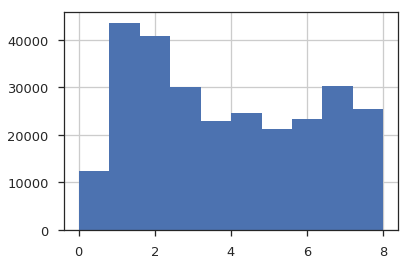

In [17]:
join_date.hist();

In [18]:
join_date = app_train.SK_ID_CURR.map(join_date)
join_date[join_date.isnull()].shape[0] / len(join_date)

0.22936740474324496

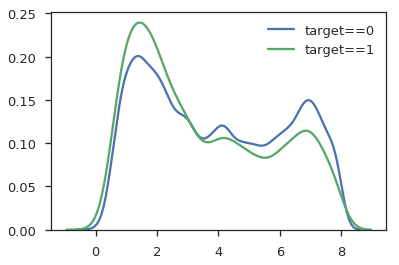

In [21]:
sns.kdeplot(join_date[app_train.TARGET == 0], label='target==0')
sns.kdeplot(join_date[app_train.TARGET == 1], label='target==1');

### Difference between date when a person opted for credit from Home Credit and Employment Date

In [26]:
join_date = prev_app.loc[(prev_app.NAME_CLIENT_TYPE == 'New') &\
            (prev_app.NAME_CONTRACT_STATUS == 'Approved')].groupby('SK_ID_CURR')['DAYS_DECISION'].max()
join_date = -join_date/365
join_date = app_train.SK_ID_CURR.map(join_date)

diff_join_employed_date = (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365) - join_date

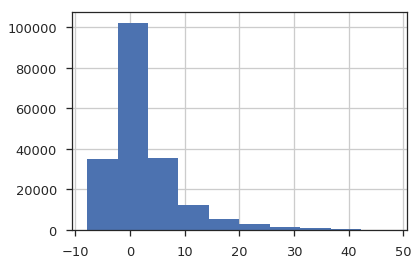

In [29]:
diff_join_employed_date.hist();

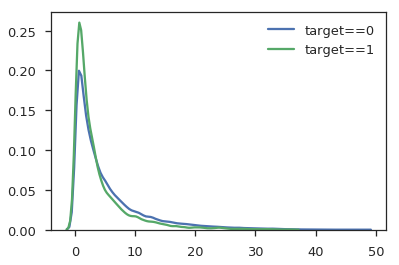

In [36]:
sns.kdeplot(diff_join_employed_date[(diff_join_employed_date > 0) & (app_train.TARGET == 0)], label='target==0')
sns.kdeplot(diff_join_employed_date[(diff_join_employed_date > 0) & (app_train.TARGET == 1)], label='target==1');

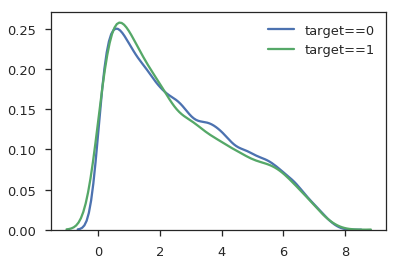

In [37]:
sns.kdeplot((-diff_join_employed_date[(diff_join_employed_date < 0) & (app_train.TARGET == 0)]), label='target==0')
sns.kdeplot((-diff_join_employed_date[(diff_join_employed_date < 0) & (app_train.TARGET == 1)]), label='target==1');

### Relationship between Income and Employment (in Years)

In [41]:
income_emp = (app_train.AMT_INCOME_TOTAL / (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365))\
             .replace([np.inf, -np.inf], np.nan)

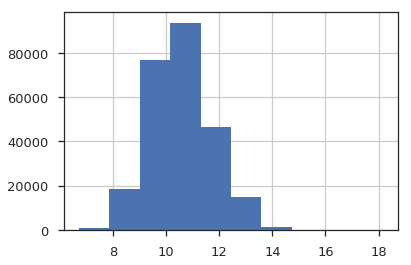

In [44]:
income_emp.map(np.log1p).hist();

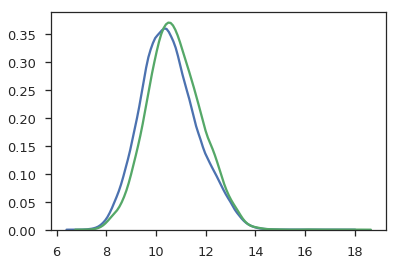

In [45]:
sns.kdeplot(income_emp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(income_emp[app_train.TARGET == 1].map(np.log1p));

### Represent contract status of previous applications as string of characters

In [102]:
%%time

contract_status_str = prev_app.sort_values(by='DAYS_DECISION', ascending=False).groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS']\
                      .apply(lambda x: ''.join([z[0:1] for z in x]))

CPU times: user 1min 21s, sys: 1.87 s, total: 1min 22s
Wall time: 1min 22s


In [103]:
contract_status_str = app_train.SK_ID_CURR.map(contract_status_str)
contract_status_str[contract_status_str.isnull()].shape[0] / len(contract_status_str)

0.05350702901684818

In [104]:
ss = pd.crosstab(contract_status_str, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss.sort_values(by=1, ascending=False))

TARGET                0.0   1.0     ratio
SK_ID_CURR                               
A                   47625  4357  0.083817
AA                  30173  2320  0.071400
AAA                 18340  1194  0.061124
AAAA                10159   567  0.052862
RA                   3615   542  0.130382
CAA                  5554   464  0.077102
CA                   5491   437  0.073718
AAAAA                5470   296  0.051335
ARA                  2663   274  0.093292
CAAA                 3955   260  0.061684
RRA                  1286   222  0.147215
RAA                  1663   204  0.109266
ACA                  1864   173  0.084929
CAAAA                2469   154  0.058711
AAAAAA               2767   150  0.051423
AARA                 1486   134  0.082716
UA                   1180   126  0.096478
CCAA                 1575   124  0.072984
CCA                  1262   114  0.082849
ACAA                 1472   107  0.067764
AR                   1009   107  0.095878
ARAA                 1081   102  0

### Relationship of external scores with months balance from bureau

In [5]:
data_recency = bureau_bal.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].max()
data_recency = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU']].merge(data_recency, how='left')
data_recency.head()

,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE
0,215354,5714462,NaN
1,215354,5714463,NaN
2,215354,5714464,NaN
3,215354,5714465,NaN
4,215354,5714466,NaN


In [6]:
data_recency = data_recency.groupby('SK_ID_CURR', as_index=False)['MONTHS_BALANCE'].max()
data_recency = app_train.loc[:, ['SK_ID_CURR',
                                 'EXT_SOURCE_1',
                                 'EXT_SOURCE_2',
                                 'EXT_SOURCE_3'
                                ]].merge(data_recency, how='left')

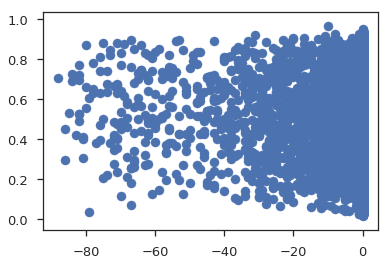

In [11]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_1);

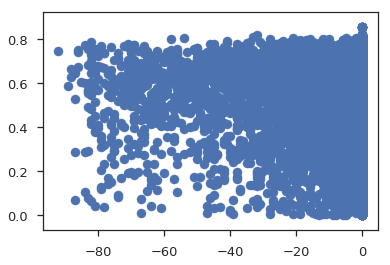

In [12]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_2);

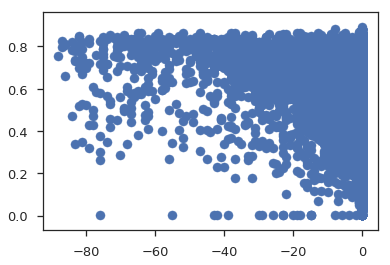

In [13]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_3);

### Hypothesis: Max Annuity of the approved previous credit and current annuity

In [55]:
max_annuity_prev_app = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'AMT_ANNUITY']]\
                               .groupby('SK_ID_CURR')['AMT_ANNUITY'].max()

max_annuity_prev_app = app_train.SK_ID_CURR.map(max_annuity_prev_app)
max_annuity_prev_app[max_annuity_prev_app.isnull()].shape[0] / len(max_annuity_prev_app)

0.056739433711314395

In [56]:
diff_curr_annuity_max_annuity_prev_app = app_train.AMT_ANNUITY - max_annuity_prev_app

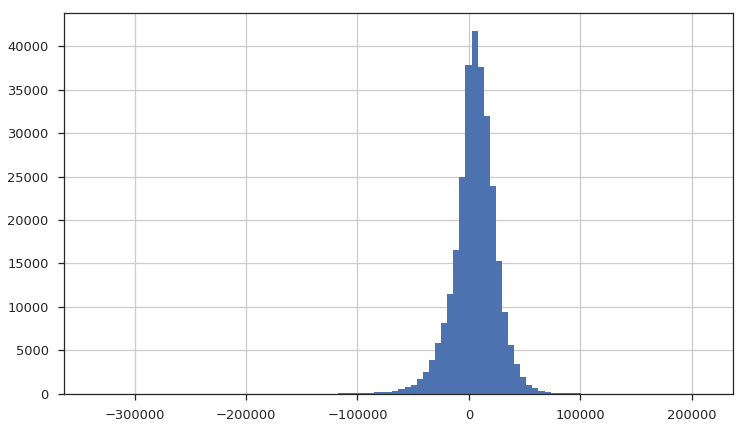

In [58]:
plt.figure(figsize=(12, 7))
diff_curr_annuity_max_annuity_prev_app.hist(bins=100);

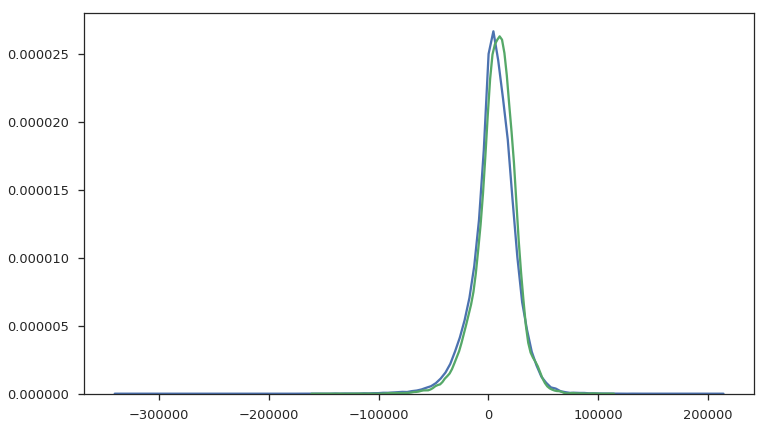

In [59]:
plt.figure(figsize=(12, 7))
sns.kdeplot(diff_curr_annuity_max_annuity_prev_app[app_train.TARGET == 0])
sns.kdeplot(diff_curr_annuity_max_annuity_prev_app[app_train.TARGET == 1]);

In [69]:
ratio_curr_annuity_max_annuity_prev_app = (app_train.AMT_ANNUITY / max_annuity_prev_app).replace([-np.inf, np.inf], np.nan)

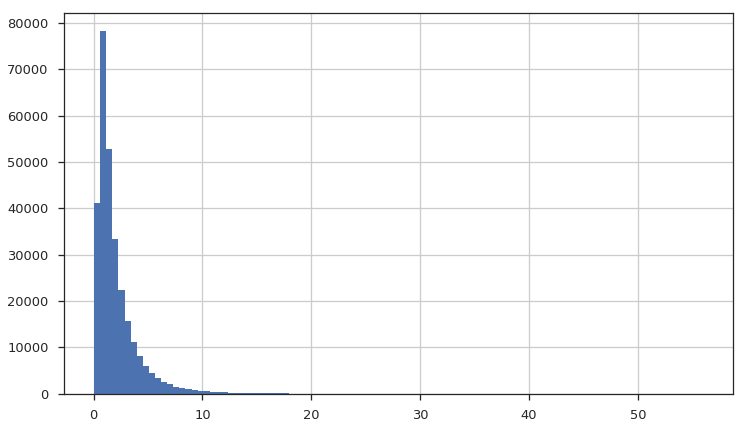

In [70]:
plt.figure(figsize=(12, 7))
ratio_curr_annuity_max_annuity_prev_app.hist(bins=100);

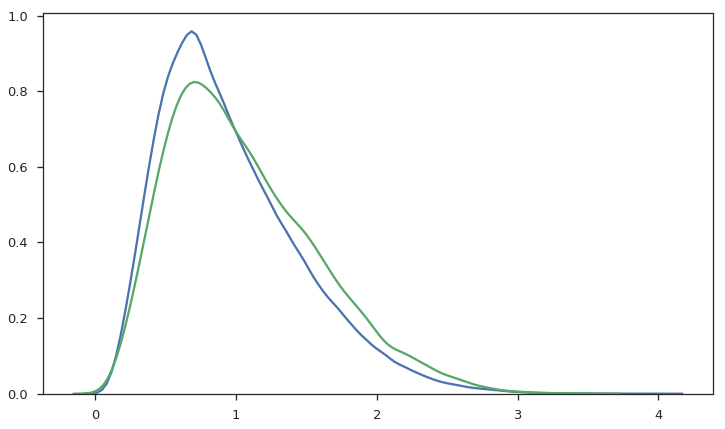

In [72]:
plt.figure(figsize=(12, 7))
sns.kdeplot(ratio_curr_annuity_max_annuity_prev_app[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(ratio_curr_annuity_max_annuity_prev_app[app_train.TARGET == 1].map(np.log1p));

### Relationship between debt, credit and credit enddate

In [39]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0) & (bureau.DAYS_CREDIT_ENDDATE > 0)
ratio_debt_credit = bureau.loc[mask, 'AMT_CREDIT_SUM'] - bureau.loc[mask, 'AMT_CREDIT_SUM_DEBT']
ratio_debt_credit_by_enddate = (ratio_debt_credit / bureau.loc[mask, 'DAYS_CREDIT_ENDDATE']).replace([-np.inf, np.inf], np.nan)
tmp = ratio_debt_credit_by_enddate.groupby(bureau.loc[mask, 'SK_ID_CURR']).mean()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.4489823128278338

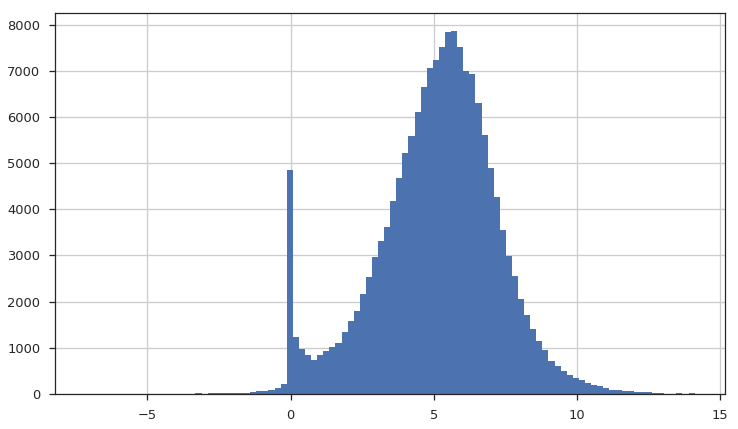

In [36]:
plt.figure(figsize=(12, 7))
tmp.map(np.log1p).hist(bins=100);

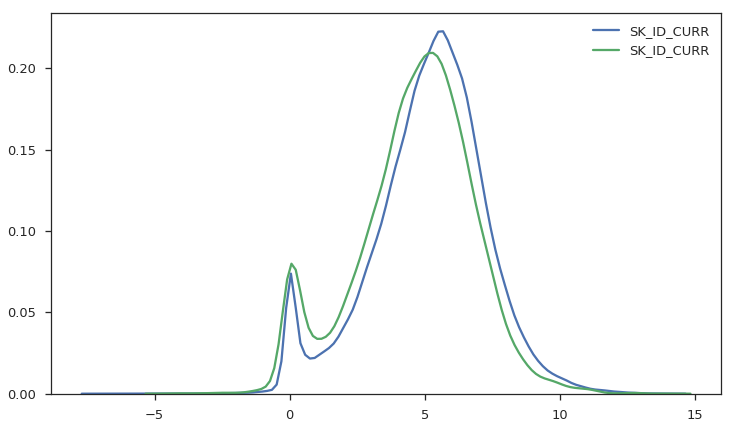

In [37]:
plt.figure(figsize=(12, 7))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Relationship between debt, credit and credit enddate and age, employed since.

In [40]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0) & (bureau.DAYS_CREDIT_ENDDATE > 0)
ratio_debt_credit = bureau.loc[mask, 'AMT_CREDIT_SUM'] - bureau.loc[mask, 'AMT_CREDIT_SUM_DEBT']
ratio_debt_credit_by_enddate = (ratio_debt_credit / bureau.loc[mask, 'DAYS_CREDIT_ENDDATE']).replace([-np.inf, np.inf], np.nan)
tmp = ratio_debt_credit_by_enddate.groupby(bureau.loc[mask, 'SK_ID_CURR']).sum()
tmp = app_train.SK_ID_CURR.map(tmp) * ((-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365) / (-app_train.DAYS_BIRTH / 365))

tmp[tmp.isnull()].shape[0] / len(tmp)

0.5431415461560725

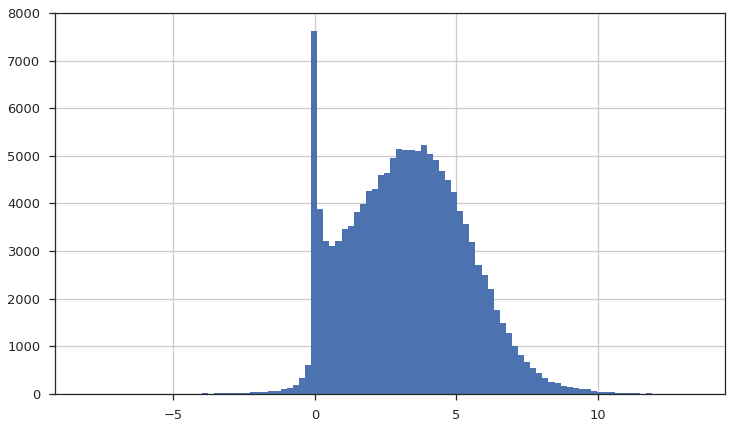

In [41]:
plt.figure(figsize=(12, 7))
tmp.map(np.log1p).hist(bins=100);

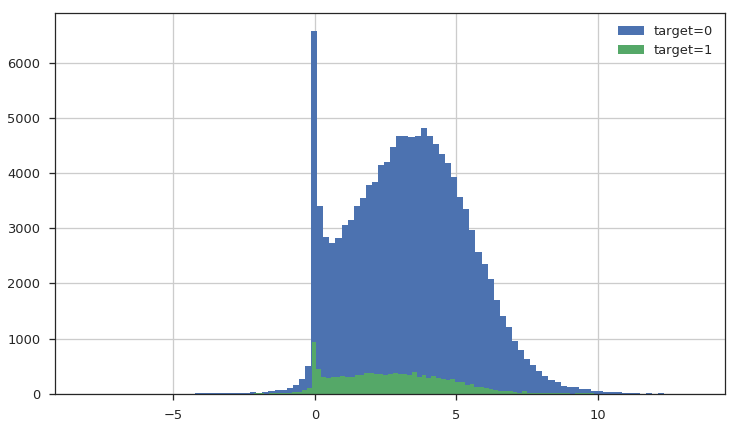

In [42]:
plt.figure(figsize=(12, 7))
tmp[app_train.TARGET == 0].map(np.log1p).hist(bins=100, label='target=0')
tmp[app_train.TARGET == 1].map(np.log1p).hist(bins=100, label='target=1')
plt.legend(loc='best');

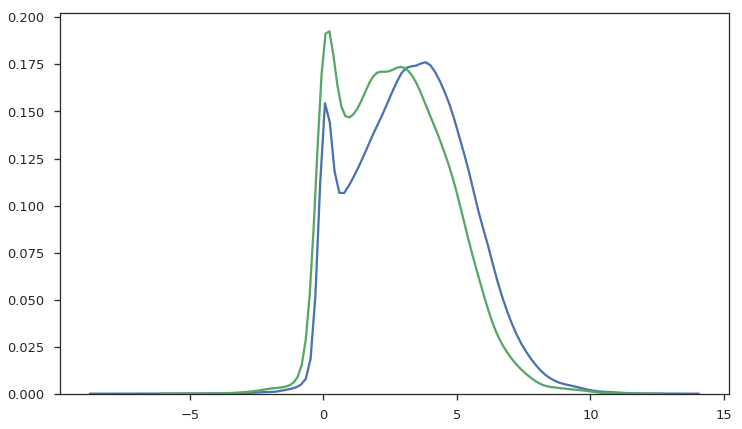

In [43]:
plt.figure(figsize=(12, 7))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));